# 라이브러리 불러오기 및 전처리 한 데이터 불러오기

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool


In [21]:
spaceship_df = pd.read_csv("./final_data/preprocessed_final_spaceship.csv")
test_df = pd.read_csv("./final_data/preprocessed_final_test.csv")

## 종속변수, 독립변수 지정

In [22]:
y_spaceship = spaceship_df["Transported"]
x_spaceship = spaceship_df.drop(["PassengerId", "Transported"], axis = 1)

In [23]:
y_spaceship

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [24]:
x_spaceship

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSize,IsAlone,Total_Amenities,NoSpending,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0.717602,-0.640372,-0.648903,-0.624889,-0.663234,-0.634810,-0.648668,1,-0.510541,1,...,0,1,0,1,0,0,0,0,0,0
1,-0.335400,1.086538,0.136898,0.641264,1.620304,0.755227,-0.648668,1,-0.248363,0,...,0,1,0,0,0,0,0,1,0,0
2,2.051404,0.749902,2.143455,-0.624889,2.525889,0.793700,-0.014569,0,3.188082,0,...,0,1,1,0,0,0,0,0,0,0
3,0.296401,-0.640372,1.793810,1.675295,2.272011,1.288796,-0.014569,0,1.333249,0,...,0,1,1,0,0,0,0,0,0,0
4,-0.897001,1.460007,0.805817,1.327477,1.630682,-0.233642,-0.648668,1,-0.121906,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.858002,-0.640372,2.363688,-0.624889,2.016570,0.941760,-0.648668,1,2.530145,0,...,0,0,1,0,0,0,0,0,0,0
8689,-0.756601,-0.640372,-0.648903,-0.624889,-0.663234,-0.634810,-0.648668,1,-0.510541,1,...,1,0,0,0,0,0,0,0,1,0
8690,-0.195000,-0.640372,-0.648903,2.303457,-0.412386,-0.634810,-0.648668,1,0.156658,0,...,0,1,0,0,0,0,0,0,1,0
8691,0.226201,-0.640372,1.725150,-0.624889,1.460845,2.316439,-0.014569,0,1.141247,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
x_test = test_df.drop(["PassengerId"], axis = 1)

In [26]:
x_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSize,IsAlone,Total_Amenities,NoSpending,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,-0.124800,-0.640372,-0.648903,-0.624889,-0.663234,-0.634810,-0.648668,1,-0.510541,1,...,0,1,0,0,0,0,0,0,1,0
1,-0.686401,-0.640372,0.136898,-0.624889,2.212364,-0.634810,-0.648668,1,0.498272,0,...,0,1,0,0,0,0,0,1,0,0
2,0.156001,-0.640372,-0.648903,-0.624889,-0.663234,-0.634810,-0.648668,1,-0.510541,1,...,0,0,0,0,1,0,0,0,0,0
3,0.647402,-0.640372,2.355227,-0.624889,1.220078,1.692465,-0.648668,1,2.131892,0,...,0,1,0,0,1,0,0,0,0,0
4,-0.616201,0.240591,-0.648903,1.883712,-0.663234,-0.634810,-0.648668,1,-0.280779,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.366601,-0.640372,-0.648903,-0.624889,-0.663234,-0.634810,-0.014569,0,-0.510541,1,...,0,1,0,0,0,0,0,0,1,0
4273,0.928202,-0.640372,1.652233,0.498359,0.204556,1.182489,-0.648668,1,-0.147910,0,...,0,1,0,0,0,0,0,1,0,0
4274,-0.134030,-0.640372,-0.648903,-0.624889,-0.663234,-0.634810,-0.648668,1,-0.510541,1,...,0,0,0,0,0,1,0,0,0,0
4275,0.378022,-0.640372,2.045055,-0.624889,-0.663234,1.651630,-0.648668,1,0.630429,0,...,0,1,0,0,0,1,0,0,0,0


# CatBoost 모델 생성 및 학습

In [27]:
model_RF = RandomForestClassifier(
	criterion = "entropy",
    random_state = 1234
)
model_RF.fit(x_spaceship, y_spaceship)

RandomForestClassifier(criterion='entropy', random_state=1234)

In [28]:
model_LGBM = lgb.LGBMClassifier(verbose = -1)
model_LGBM.fit(x_spaceship, y_spaceship)

LGBMClassifier(verbose=-1)

In [29]:
model_CB = CatBoostClassifier(verbose = 0)
model_CB.fit(x_spaceship, y_spaceship)

## 교차검증

In [30]:
stratified_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1234)

In [31]:
score_RF = cross_val_score(model_RF, x_spaceship, y_spaceship, cv = stratified_kf)

In [32]:
score_LGBM = cross_val_score(model_LGBM, x_spaceship, y_spaceship, cv = stratified_kf)

In [33]:
score_CB = cross_val_score(model_CB, x_spaceship, y_spaceship, cv = stratified_kf)

In [34]:
print(score_RF.mean())
print(score_LGBM.mean())
print(score_CB.mean())

0.7935118724238035
0.8097311987697122
0.8114559972895551


# 전체 데이터에 대해서 학습 및 예측

In [35]:
model = CatBoostClassifier(verbose = 0)
model.fit(x_spaceship, y_spaceship)

In [36]:
y_test = model.predict(x_test)

In [37]:
test_df["Transported"] = y_test

In [38]:
test_df[["PassengerId", "Transported"]].to_csv("./final_data/sample_submission_final.csv", index = False)

# Features 확인

In [23]:
feature_names = x_train.columns.to_list()

In [24]:
importances = model.feature_importances_

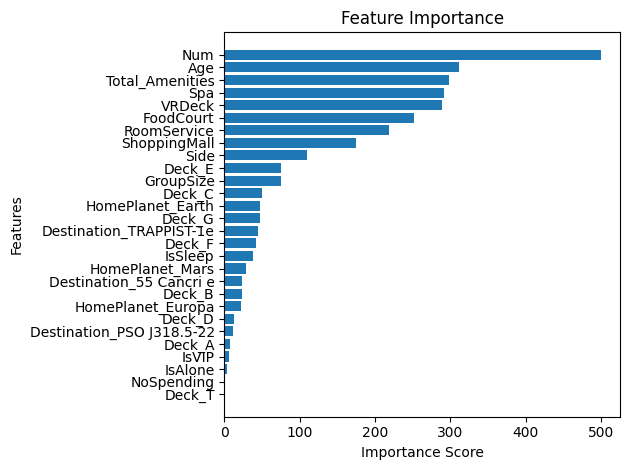

In [25]:
import numpy as np

indices = np.argsort(importances)
sorted_feature_names = [feature_names[i] for i in indices]

# Create plot
plt.figure()
plt.title("Feature Importance")
ticks = range(len(feature_names))
plt.barh(ticks, importances[indices], align="center")
plt.yticks(ticks, sorted_feature_names)
plt.ylabel("Features")
plt.xlabel("Importance Score")

plt.tight_layout()
plt.show()